In [32]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import csv

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv(city_data)
ride_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
# Merge the two DataFrames together based on their common columns ("city") they share
ride_city_df = pd.merge(ride_df, city_df, how= "left", on=["city","city"])
#city_ride_data = pd.merge(ride_data, city_data, how=“left”, on=[“city”, “city”])
#print(ride_city_df)


#URBAN AREA OF CODE
#============================================================================================
#create a table for ONLY urban cities called urban_cities
urban_cities = ride_city_df[ride_city_df["type"] == "Urban"]
#print(urban_cities)
urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
#print(urban_ride_count)
max_urban_ride_count = urban_ride_count.max()
#print(max_urban_ride_count)

#calculate the urban average fare per urban city
urban_avg_fare = urban_cities.groupby(["city"]).mean()["fare"]
#print(urban_avg_fare)
max_urban_avg_fare = urban_avg_fare.max()
#print(max_urban_avg_fare)

#calculate the urban driver count per urban city

urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]
#print(urban_driver_count)
max_urban_driver_count = urban_driver_count.max()
#print(max_urban_driver_count)

#=================================================================================================
                                                          
#SUBURBAN AREA OF CODE
#=================================================================================================
#group all of the suburban cities in a single table
suburban_cities = ride_city_df[ride_city_df.type == "Suburban"]
#print(suburban_cities)

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
#print(suburban_ride_count)
max_suburban_ride_count = suburban_ride_count.max()
#print(max_suburban_ride_count)

#calculate the urban average fare per urban city
suburban_avg_fare = suburban_cities.groupby(["city"]).mean()["fare"]
#print(suburban_avg_fare)

max_suburban_avg_fare = suburban_avg_fare.max()
#print(max_suburban_avg_fare)

#calculate the urban driver count per urban city
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]
#print(suburban_driver_count)
max_suburban_driver_count = suburban_driver_count.max()
#print(max_suburban_driver_count)
 
#=================================================================================
#RURAL AREA OF CODE
#=================================================================================

#group all of the rural cities in a single table
#rural_cities = ride_city_df[ride_city_df.type =="Rural"]
rural_cities = ride_city_df[ride_city_df["type"] == "Rural"]
#print(rural_cities)

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
#print(rural_ride_count)
max_rural_ride_count = rural_ride_count.max()
#print(max_rural_ride_count)

#calculate the urban average fare per urban city type
rural_avg_fare = rural_cities.groupby(["city"]).mean()["fare"]
#print(rural_avg_fare)

max_rural_avg_fare = rural_avg_fare.max()
#print(max_rural_avg_fare)

#calculate the urban driver count per urban city
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]
#print(rural_driver_count)
max_rural_driver_count = rural_driver_count.max()
#print(max_rural_driver_count)


#=======================================================================================
#PERCENT OF TOTAL FARES BY CITY TYPE
#============================================================================================
#calculate the total  fare sum for all types
total_type_fare_sum = ride_city_df.groupby(['type']).fare.sum()

#calculate the total fares per city type (total rural, total urban, total suburban)
total_rural_fare_sum = total_type_fare_sum[0]
#print("The total fare for all rural types: ",total_rural_fare_sum)
total_urban_fare_sum = total_type_fare_sum[2]
#print("The total fare for all urban types: ",total_urban_fare_sum)
total_suburban_fare_sum = total_type_fare_sum[1]
#print("The total fare for all suburban types: ",total_suburban_fare_sum)
total_overall_fares_combined = ride_city_df.fare.sum()

#calculate the percentage of total fares by type
percent_rural_fare = (total_rural_fare_sum/total_overall_fares_combined)*100
#print(percent_rural_fare)
percent_suburban_fare = (total_suburban_fare_sum/total_overall_fares_combined)*100
#print(percent_suburban_fare)
percent_urban_fare = (total_urban_fare_sum/total_overall_fares_combined)*100
#print(percent_urban_fare)
#---------------------------------------------------------------------------------------------
#PERCENT OF TOTAL RIDES BY CITY TYPE
#=============================================================================================
#calculate the total overall rides with all three types combined
total_overall_rides = ride_city_df.ride_id.count()
#print(total_overall_rides)

#calculate the total rides per city type
total_urban_rides = urban_cities.ride_id.count()
#print(total_urban_rides)
total_suburban_rides = suburban_cities.ride_id.count()
#print(total_suburban_rides)
total_rural_rides = rural_cities.ride_id.count()
#print(total_rural_rides)

#calculate the percentagesof rides by city type
percent_urban_rides = (total_urban_rides/total_overall_rides)*100
#print(percent_urban_rides)
percent_suburban_rides = (total_suburban_rides/total_overall_rides)*100
#print(percent_suburban_rides)
percent_rural_rides = (total_rural_rides/total_overall_rides)*100
#print(percent_rural_rides)

#calculate the average fare per city
avg_fare = ride_city_df.groupby(["type", "city"]).fare.mean()
#print(avg_fare)


#calculate the total urban fare across all urban cities
total_type_fare_sum = ride_city_df.groupby(['type']).fare.sum()
#print("The total sums for all types: ",total_type_fare_sum)

#TOTAL NUMBER OF RIDES BY CITY TYPE
#calculate the total number of rides for all cities combined
total_num_rides = ride_city_df.groupby(["type" , "city"]).ride_id.count()
#print(total_num_rides)
overall_total_num_rides = total_num_rides.sum()
#print(overall_total_num_rides)



 



## Bubble Plot of Ride Sharing Data

Text(42, 35, 'Note:\nCircle size correlates with driver count per city.')

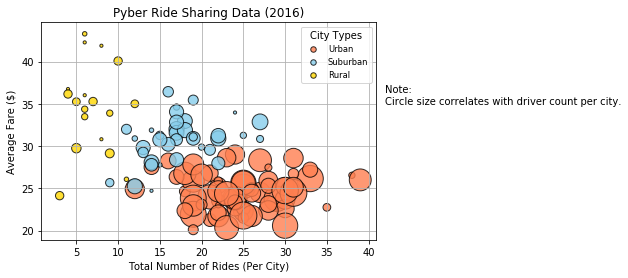

In [33]:
#print the urban part of the scatter plot using the urban calculations above


# The maximum x-value for our chart will be the max total number of rides
x_limit = max_urban_ride_count
#print(x_limit)
#x_min = min_total_num_rides
#print(x_min)

# List of values from 0 to max_total_num_rides each value being 1 greater than the last
x_axis = np.arange(0, x_limit, 1)

# The maximum y-value for our chart will be the max avg fare

y_limit = max_urban_avg_fare
#print(y_limit)
#y_min = min_avg_fare
y_axis = np.arange(0, y_limit, 1)

# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

plt.scatter(urban_ride_count,
           urban_avg_fare,
           s=10*urban_driver_count, facecolors="coral",
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=10*suburban_driver_count, facecolors="skyblue",
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=10*rural_driver_count, c="gold",
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Rural")



# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)


# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded",
                 numpoints=1, scatterpoints=1,
                 loc="best", title="City Types",
                 labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]


# Incorporate a text label regarding circle size
plt.text(42, 35, "Note:\nCircle size correlates with driver count per city.")


# Save Figure
#plt.savefig("analysis/Fig1.png")


In [34]:
# Show plot
plt.show()

## Total Fares by City Type

In [35]:
# To calculate Type Percents, first need overall total fare types
#calculate the overall total fare for all combined cities
total_overall_fares_combined = ride_city_df.fare.sum()
#print("The total overall fares combined: ",total_overall_fares_combined)
#ride_city_df.groupby(["city"]).fare.sum()
#print(total_fare_per_city)

#calculate the total urban fare across all urban cities
total_type_fare_sum = ride_city_df.groupby(['type']).fare.sum()
#print("The total sums for all types: ",total_type_fare_sum)


#calculate the total fares per city type (total rural, total urban, total suburban)
total_rural_fare_sum = total_type_fare_sum[0]
#print("The total fare for all rural types: ",total_rural_fare_sum)
total_urban_fare_sum = total_type_fare_sum[2]
#print("The total fare for all urban types: ",total_urban_fare_sum)
total_suburban_fare_sum = total_type_fare_sum[1]
#print("The total fare for all suburban types: ",total_suburban_fare_sum)

#calculate the percentage of total fares by type
percent_rural_fare = (total_rural_fare_sum/total_overall_fares_combined)*100
#print(percent_rural_fare)
percent_suburban_fare = (total_suburban_fare_sum/total_overall_fares_combined)*100
#print(percent_suburban_fare)
percent_urban_fare = (total_urban_fare_sum/total_overall_fares_combined)*100
#print(percent_urban_fare)


# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [percent_rural_fare, percent_suburban_fare, percent_urban_fare]

# The colors of each section of the pie chart
colors = ["gold", "skyblue", "coral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
#        autopct="%1.1f%%", shadow=True, startangle=140)

# Save Figure
plt.savefig("matlib2.png")

<Figure size 432x288 with 0 Axes>

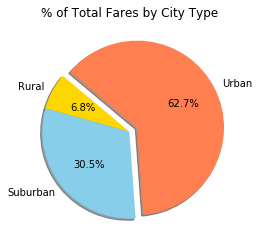

In [36]:
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type")

# Save Figure
# Show Figure
plt.show()

## Total Rides by City Type

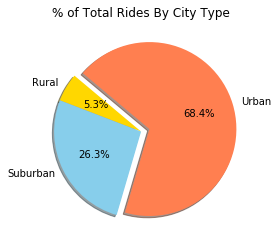

In [37]:
# Calculate Ride Percents
#calculate the total overall rides with all three types combined
total_overall_rides = ride_city_df.ride_id.count()
#print(total_overall_rides)

#calculate the total rides per city type
total_urban_rides = urban_cities.ride_id.count()
#print(total_urban_rides)
total_suburban_rides = suburban_cities.ride_id.count()
#print(total_suburban_rides)
total_rural_rides = rural_cities.ride_id.count()
#print(total_rural_rides)

#calculate the percentages of rides by city type
percent_urban_rides = (total_urban_rides/total_overall_rides)*100
#print(percent_urban_rides)
percent_suburban_rides = (total_suburban_rides/total_overall_rides)*100
#print(percent_suburban_rides)
percent_rural_rides = (total_rural_rides/total_overall_rides)*100
#print(percent_rural_rides)




# Build Pie Chart
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [percent_rural_rides, percent_suburban_rides, percent_urban_rides]

# The colors of each section of the pie chart
colors = ["gold", "skyblue", "coral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Rides By City Type")



# Save Figure
plt.savefig("matlib1.png")


In [38]:
# Show Figure
plt.show()

## Total Drivers by City Type

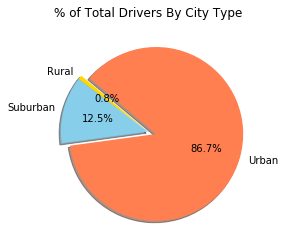

In [39]:
# Calculate Driver Percents

#calculate the total overall drivers with all three types combined
total_overall_drivers = ride_city_df.driver_count.sum()
#print(total_overall_drivers)

#calculate the total drivers per city type
total_urban_drivers = urban_cities.driver_count.sum()
#print(total_urban_drivers)
total_suburban_drivers = suburban_cities.driver_count.sum()
#print(total_suburban_drivers)
total_rural_drivers = rural_cities.driver_count.sum()
#print(total_rural_drivers)

#calculate the percentages of rides by city type
percent_urban_drivers = (total_urban_drivers/total_overall_drivers)*100
#print(percent_urban_drivers)
percent_suburban_drivers = (total_suburban_drivers/total_overall_drivers)*100
#print(percent_suburban_drivers)
percent_rural_drivers = (total_rural_drivers/total_overall_drivers)*100
#print(percent_rural_drivers)





# Build Pie Charts
# Labels for the sections of our pie chart
labels = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [percent_rural_drivers, percent_suburban_drivers, percent_urban_drivers]

# The colors of each section of the pie chart
colors = ["gold", "skyblue", "coral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0, 0.1)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% of Total Drivers By City Type")


# Save Figure
plt.savefig("matlib.png")


In [40]:
# Show Figure
plt.show()